Length of vgs: 13
Length of gm_id: 13
Length of labels: 13


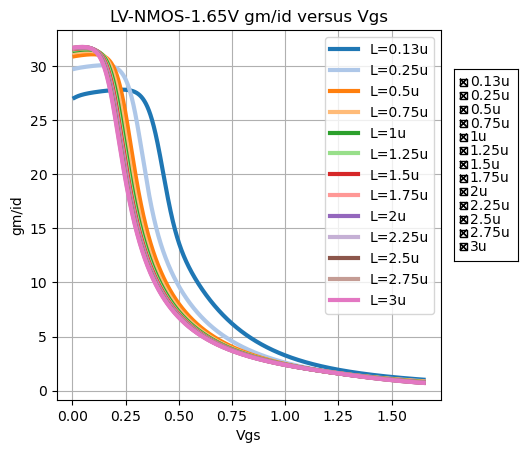

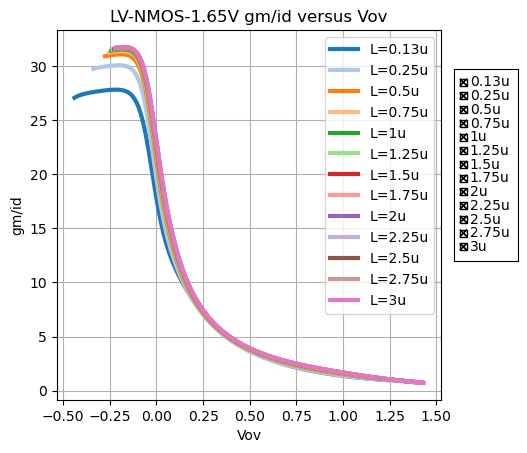

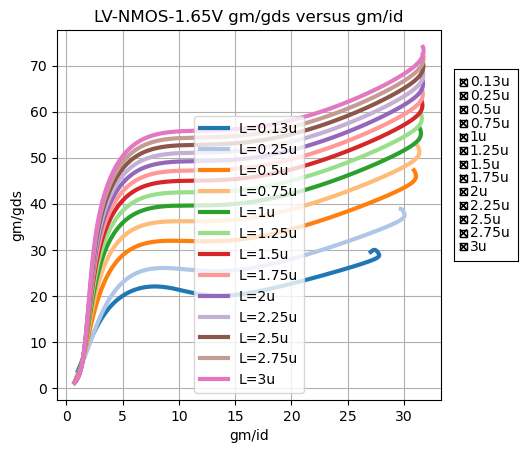

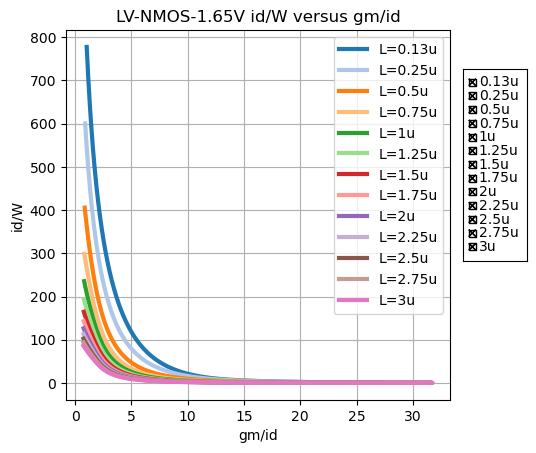

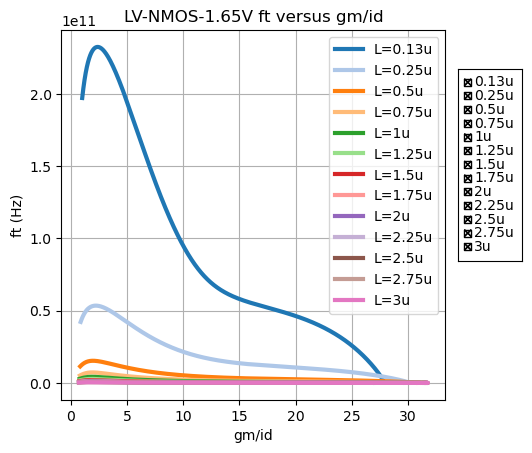

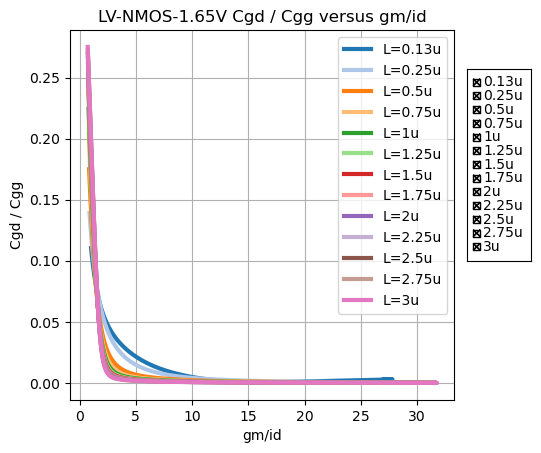

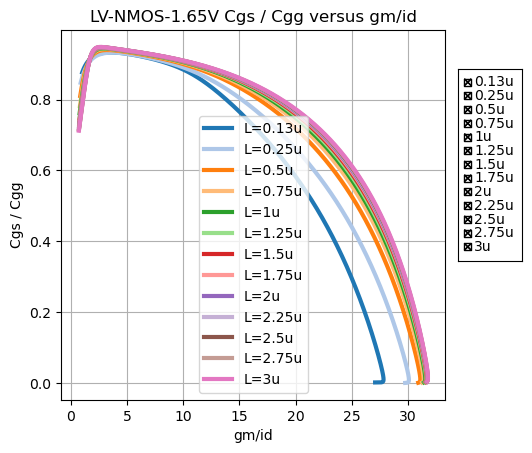

In [1]:
import matplotlib.pyplot as plt  # type: ignore
from matplotlib.widgets import CheckButtons  # type: ignore
import numpy as np

# Define the path to the directory
path = r"C:\Users\NITHIN P\Downloads\gmid_IHP130\gmid Data\LV_NMOS\\"

# Initialize lists for storing results
vgs = [[] for _ in range(13)]
gm_id = [[] for _ in range(13)]
gm_gds = [[] for _ in range(13)]
id_W = [[] for _ in range(13)]
ft = [[] for _ in range(13)]      # ft = gm / Cgg
cgd_cgg = [[] for _ in range(13)] # Cgd / Cgg
cgs_cgg = [[] for _ in range(13)] # Cgs / Cgg
Vov = [[] for _ in range(13)]     # Vov
W = 2e-6  # SKY130 W

# Read data from the text files
for i in range(13):
    filename = path + "gmid_nmos_" + str(i + 1) + "_sg13_lv_nmos_tb.txt"
    try:
        with open(filename, 'r') as fID:
            for line in fID:
                try:
                    temp = list(map(float, line.strip().split()))
                    if len(temp) >= 14:  # Now we're expecting at least 14 columns
                        Vgs = temp[0]
                        gm = temp[1]
                        id_val = temp[3]
                        Vth = temp[5]
                        gds = temp[7]
                        Cgg = temp[9]  # 10th column is Cgg
                        Cgs = abs(temp[11])  # 12th column is Cgs
                        Cgd = abs(temp[13])  # 13th column is Cgd

                        # Calculate Vov
                        vov_value = Vgs - Vth

                        # Apply the condition Vov > 0
                        #if vov_value > 0:
                        vgs[i].append(Vgs)
                        Vov[i].append(Vgs - Vth)
                        gm_id[i].append(gm / id_val)
                        gm_gds[i].append(gm / gds)
                        id_W[i].append(id_val / W)

                            # Calculate ft, Cgd/Cgg, and Cgs/Cgg
                        ft[i].append(gm / (2 * np.pi * Cgg))
                        cgd_cgg[i].append(Cgd / Cgg)
                        cgs_cgg[i].append(Cgs / Cgg)
                except (ValueError, IndexError) as e:
                    print(f"Warning: Skipping line due to error: {e}")
    except FileNotFoundError:
        print(f"Error: File {filename} not found.")
    except Exception as e:
        print(f"Error: An unexpected error occurred with file {filename}: {e}")

# Labels for different transistor lengths
labels = ['0.13u', '0.25u', '0.5u', '0.75u', '1u', '1.25u', '1.5u', '1.75u', '2u', '2.25u', '2.5u', '2.75u', '3u']  # IHP130 Lengths

# Debugging: Print lengths of data arrays
print(f"Length of vgs: {len(vgs)}")
print(f"Length of gm_id: {len(gm_id)}")
print(f"Length of labels: {len(labels)}")

# Make sure all data lists and labels have the same length
min_length = min(len(vgs), len(gm_id), len(gm_gds), len(id_W), len(ft), len(cgd_cgg), len(cgs_cgg), len(Vov), len(labels))

# Function to auto-scale the axes based on visible lines and add margin
def autoscale_lines(ax, lines, margin=0.05):
    x_data = []
    y_data = []

    # Collect data from visible lines
    for line in lines:
        if line.get_visible():
            x_data.extend(line.get_xdata())
            y_data.extend(line.get_ydata())

    if x_data and y_data:  # If there is visible data
        x_min, x_max = min(x_data), max(x_data)
        y_min, y_max = min(y_data), max(y_data)

        # Add margin (percentage of the range)
        x_margin = (x_max - x_min) * margin
        y_margin = (y_max - y_min) * margin

        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)
    else:  # Default to a small range if no data is visible
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

# Function to plot with checkboxes for toggling visibility
def plot_with_checkboxes(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.2, right=0.8)  # Adjust for space for checkboxes

    # Use a more varied colormap for better visibility
    colormap = plt.get_cmap('tab20')  # Using 'tab20' colormap for distinct colors

    # Plot lines
    lines = []
    for i in range(min_length):
        line, = ax.plot(x_data[i], y_data[i], linestyle='-', color=colormap(i), linewidth=3, label=f"L={labels[i]}")
        lines.append(line)

    # Set labels, title, and grid
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

    # Add checkboxes
    rax = plt.axes([0.82, 0.4, 0.1, 0.4])
    visibility = [True] * min_length  # Initialize all to be visible
    check = CheckButtons(rax, labels, visibility)

    # Function to handle checkbox toggle and auto-scale
    def toggle_lines(label):
        index = labels.index(label)
        lines[index].set_visible(not lines[index].get_visible())
        autoscale_lines(ax, lines)  # Auto-scale after toggling
        plt.draw()

    check.on_clicked(toggle_lines)

    # Initial auto-scaling
    autoscale_lines(ax, lines)
    plt.show()

# Plot gm/id versus Vgs
plot_with_checkboxes(vgs, gm_id, 'Vgs', 'gm/id', 'LV-NMOS-1.65V gm/id versus Vgs')

# Plot gm/id versus Vov
plot_with_checkboxes(Vov, gm_id, 'Vov', 'gm/id', 'LV-NMOS-1.65V gm/id versus Vov')

# Plot gm/gds versus gm/id
plot_with_checkboxes(gm_id, gm_gds, 'gm/id', 'gm/gds', 'LV-NMOS-1.65V gm/gds versus gm/id')

# Plot id/W versus gm/id
plot_with_checkboxes(gm_id, id_W, 'gm/id', 'id/W', 'LV-NMOS-1.65V id/W versus gm/id')

# Plot ft = gm / Cgg versus gm/id
plot_with_checkboxes(gm_id, ft, 'gm/id', 'ft (Hz)', 'LV-NMOS-1.65V ft versus gm/id')

# Plot Cgd / Cgg versus gm/id
plot_with_checkboxes(gm_id, cgd_cgg, 'gm/id', 'Cgd / Cgg', 'LV-NMOS-1.65V Cgd / Cgg versus gm/id')

# Plot Cgs / Cgg versus gm/id
plot_with_checkboxes(gm_id, cgs_cgg, 'gm/id', 'Cgs / Cgg', 'LV-NMOS-1.65V Cgs / Cgg versus gm/id')


Length of vgs: 13
Length of gm_id: 13
Length of labels: 13


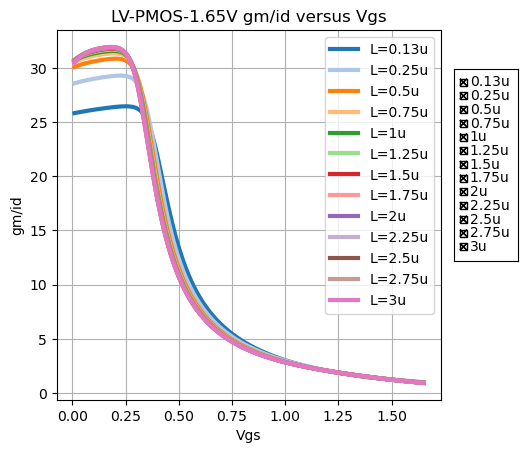

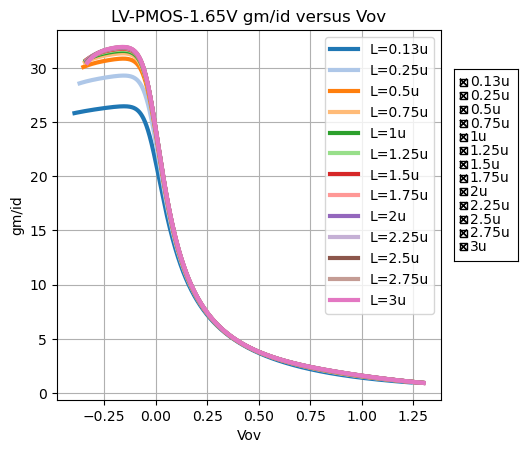

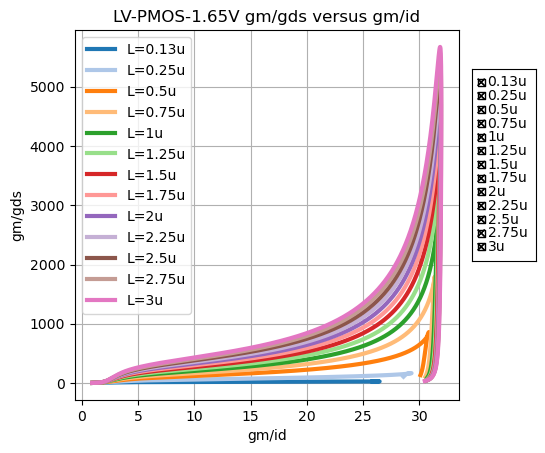

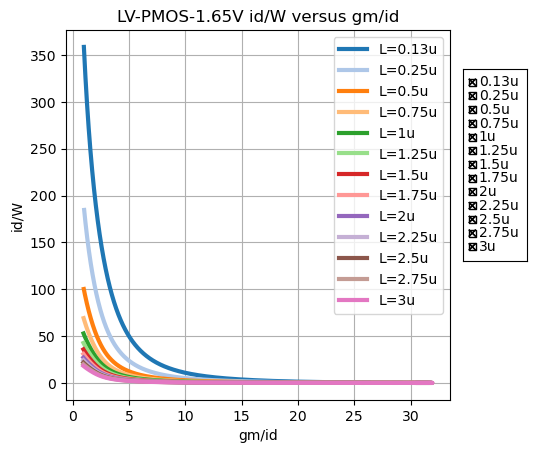

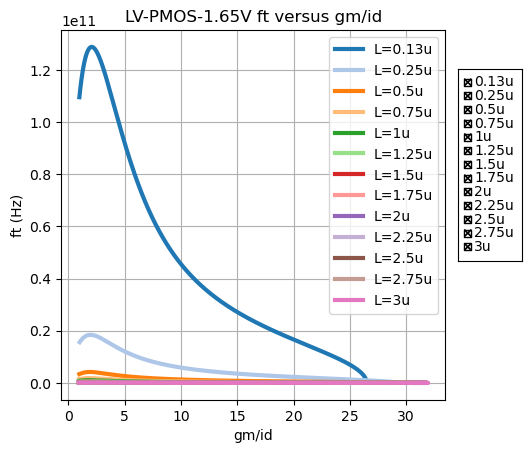

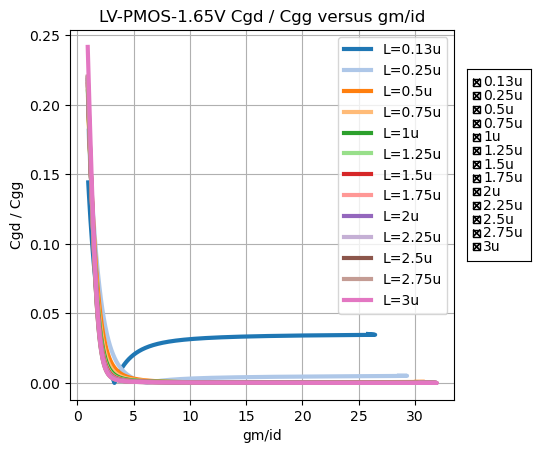

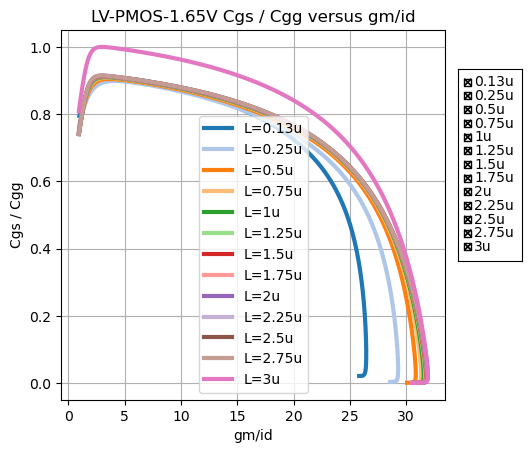

In [3]:
import matplotlib.pyplot as plt  # type: ignore
from matplotlib.widgets import CheckButtons  # type: ignore
import numpy as np

# Define the path to the directory
path = r"C:\Users\NITHIN P\Downloads\gmid_IHP130\gmid Data\LV_PMOS\\"

# Initialize lists for storing results
vgs = [[] for _ in range(13)]
gm_id = [[] for _ in range(13)]
gm_gds = [[] for _ in range(13)]
id_W = [[] for _ in range(13)]
ft = [[] for _ in range(13)]      # ft = gm / Cgg
cgd_cgg = [[] for _ in range(13)] # Cgd / Cgg
cgs_cgg = [[] for _ in range(13)] # Cgs / Cgg
Vov = [[] for _ in range(13)]     # Vov
W = 2e-6  # SKY130 W

# Read data from the text files
for i in range(13):
    filename = path + "gmid_pmos_" + str(i + 1) + "_sg13_lv_pmos_tb.txt"
    try:
        with open(filename, 'r') as fID:
            for line in fID:
                try:
                    temp = list(map(float, line.strip().split()))
                    if len(temp) >= 14:  # Now we're expecting at least 14 columns
                        Vgs = temp[0]
                        gm = temp[1]
                        id_val = temp[3]
                        Vth = temp[5]
                        gds = temp[7]
                        Cgg = temp[9]  # 10th column is Cgg
                        Cgs = abs(temp[11])  # 12th column is Cgs
                        Cgd = abs(temp[13])  # 13th column is Cgd

                        # Calculate Vov
                        vov_value = Vgs - Vth

                        # Apply the condition Vov > 0
                        #if vov_value > 0:
                        vgs[i].append(Vgs)
                        Vov[i].append(Vgs - Vth)
                        gm_id[i].append(gm / id_val)
                        gm_gds[i].append(gm / gds)
                        id_W[i].append(id_val / W)

                            # Calculate ft, Cgd/Cgg, and Cgs/Cgg
                        ft[i].append(gm / (2 * np.pi * Cgg))
                        cgd_cgg[i].append(Cgd / Cgg)
                        cgs_cgg[i].append(Cgs / Cgg)
                except (ValueError, IndexError) as e:
                    print(f"Warning: Skipping line due to error: {e}")
    except FileNotFoundError:
        print(f"Error: File {filename} not found.")
    except Exception as e:
        print(f"Error: An unexpected error occurred with file {filename}: {e}")

# Labels for different transistor lengths
labels = ['0.13u', '0.25u', '0.5u', '0.75u', '1u', '1.25u', '1.5u', '1.75u', '2u', '2.25u', '2.5u', '2.75u', '3u']  # IHP130 Lengths

# Debugging: Print lengths of data arrays
print(f"Length of vgs: {len(vgs)}")
print(f"Length of gm_id: {len(gm_id)}")
print(f"Length of labels: {len(labels)}")

# Make sure all data lists and labels have the same length
min_length = min(len(vgs), len(gm_id), len(gm_gds), len(id_W), len(ft), len(cgd_cgg), len(cgs_cgg), len(Vov), len(labels))

# Function to auto-scale the axes based on visible lines and add margin
def autoscale_lines(ax, lines, margin=0.05):
    x_data = []
    y_data = []

    # Collect data from visible lines
    for line in lines:
        if line.get_visible():
            x_data.extend(line.get_xdata())
            y_data.extend(line.get_ydata())

    if x_data and y_data:  # If there is visible data
        x_min, x_max = min(x_data), max(x_data)
        y_min, y_max = min(y_data), max(y_data)

        # Add margin (percentage of the range)
        x_margin = (x_max - x_min) * margin
        y_margin = (y_max - y_min) * margin

        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)
    else:  # Default to a small range if no data is visible
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

# Function to plot with checkboxes for toggling visibility
def plot_with_checkboxes(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.2, right=0.8)  # Adjust for space for checkboxes

    # Use a more varied colormap for better visibility
    colormap = plt.get_cmap('tab20')  # Using 'tab20' colormap for distinct colors

    # Plot lines
    lines = []
    for i in range(min_length):
        line, = ax.plot(x_data[i], y_data[i], linestyle='-', color=colormap(i), linewidth=3, label=f"L={labels[i]}")
        lines.append(line)

    # Set labels, title, and grid
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

    # Add checkboxes
    rax = plt.axes([0.82, 0.4, 0.1, 0.4])
    visibility = [True] * min_length  # Initialize all to be visible
    check = CheckButtons(rax, labels, visibility)

    # Function to handle checkbox toggle and auto-scale
    def toggle_lines(label):
        index = labels.index(label)
        lines[index].set_visible(not lines[index].get_visible())
        autoscale_lines(ax, lines)  # Auto-scale after toggling
        plt.draw()

    check.on_clicked(toggle_lines)

    # Initial auto-scaling
    autoscale_lines(ax, lines)
    plt.show()

# Plot gm/id versus Vgs
plot_with_checkboxes(vgs, gm_id, 'Vgs', 'gm/id', 'LV-PMOS-1.65V gm/id versus Vgs')

# Plot gm/id versus Vov
plot_with_checkboxes(Vov, gm_id, 'Vov', 'gm/id', 'LV-PMOS-1.65V gm/id versus Vov')

# Plot gm/gds versus gm/id
plot_with_checkboxes(gm_id, gm_gds, 'gm/id', 'gm/gds', 'LV-PMOS-1.65V gm/gds versus gm/id')

# Plot id/W versus gm/id
plot_with_checkboxes(gm_id, id_W, 'gm/id', 'id/W', 'LV-PMOS-1.65V id/W versus gm/id')

# Plot ft = gm / Cgg versus gm/id
plot_with_checkboxes(gm_id, ft, 'gm/id', 'ft (Hz)', 'LV-PMOS-1.65V ft versus gm/id')

# Plot Cgd / Cgg versus gm/id
plot_with_checkboxes(gm_id, cgd_cgg, 'gm/id', 'Cgd / Cgg', 'LV-PMOS-1.65V Cgd / Cgg versus gm/id')

# Plot Cgs / Cgg versus gm/id
plot_with_checkboxes(gm_id, cgs_cgg, 'gm/id', 'Cgs / Cgg', 'LV-PMOS-1.65V Cgs / Cgg versus gm/id')


Length of vgs: 13
Length of gm_id: 13
Length of labels: 13


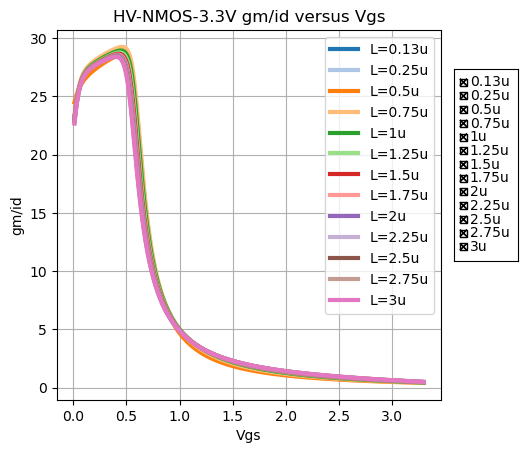

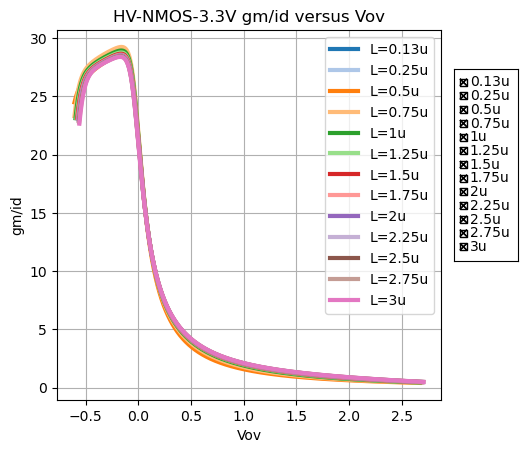

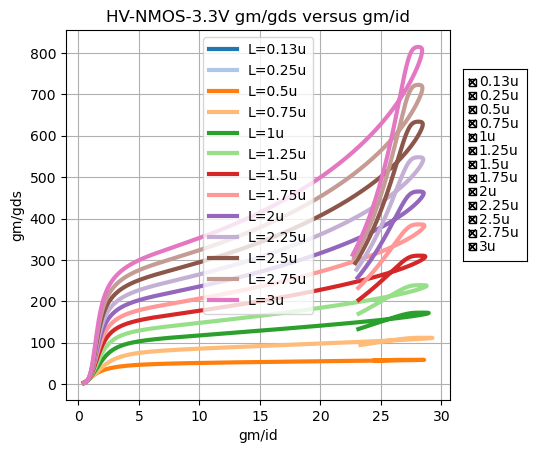

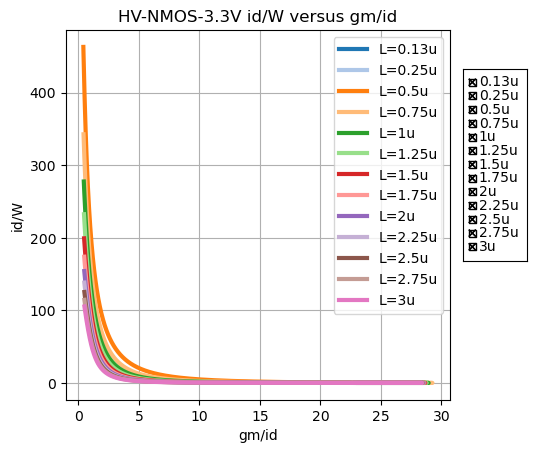

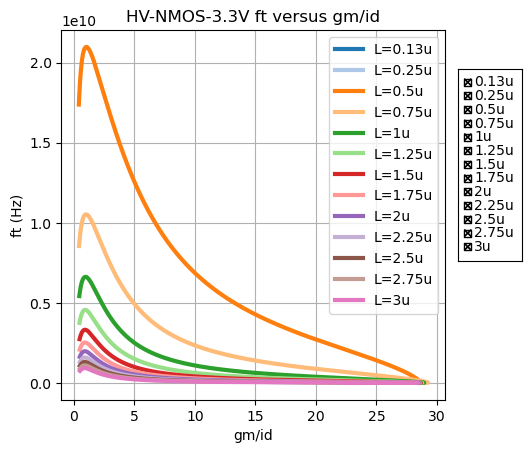

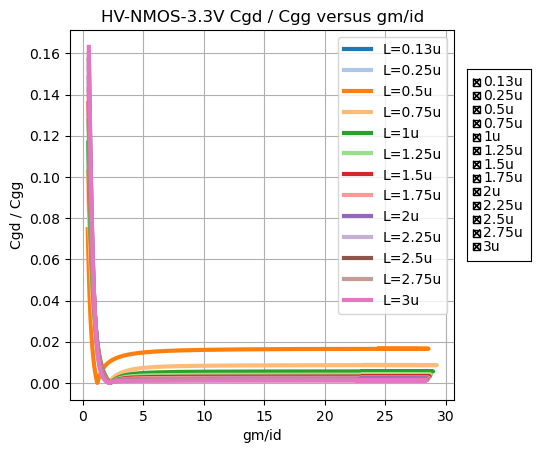

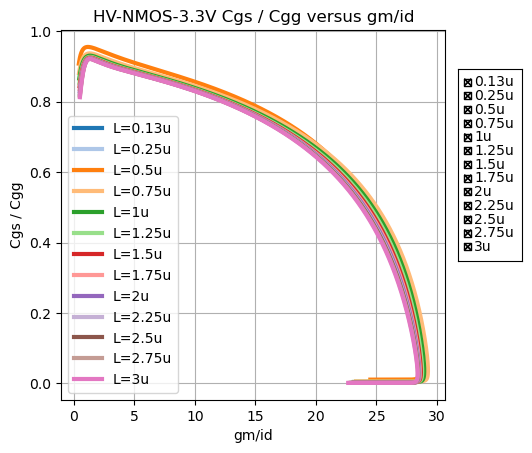

In [5]:
import matplotlib.pyplot as plt  # type: ignore
from matplotlib.widgets import CheckButtons  # type: ignore
import numpy as np

# Define the path to the directory
path = r"C:\Users\NITHIN P\Downloads\gmid_IHP130\gmid Data\HV_NMOS\\"

# Initialize lists for storing results
vgs = [[] for _ in range(13)]
gm_id = [[] for _ in range(13)]
gm_gds = [[] for _ in range(13)]
id_W = [[] for _ in range(13)]
ft = [[] for _ in range(13)]      # ft = gm / Cgg
cgd_cgg = [[] for _ in range(13)] # Cgd / Cgg
cgs_cgg = [[] for _ in range(13)] # Cgs / Cgg
Vov = [[] for _ in range(13)]     # Vov
W = 2e-6  # SKY130 W

# Read data from the text files
for i in range(2, 13):
    filename = path + "gmid_nmos_" + str(i + 1) + "_sg13_hv_nmos_tb.txt"
    try:
        with open(filename, 'r') as fID:
            for line in fID:
                try:
                    temp = list(map(float, line.strip().split()))
                    if len(temp) >= 14:  # Now we're expecting at least 14 columns
                        Vgs = temp[0]
                        gm = temp[1]
                        id_val = temp[3]
                        Vth = temp[5]
                        gds = temp[7]
                        Cgg = temp[9]  # 10th column is Cgg
                        Cgs = abs(temp[11])  # 12th column is Cgs
                        Cgd = abs(temp[13])  # 13th column is Cgd

                        # Calculate Vov
                        vov_value = Vgs - Vth

                        # Apply the condition Vov > 0
                        #if vov_value > 0:
                        vgs[i].append(Vgs)
                        Vov[i].append(Vgs - Vth)
                        gm_id[i].append(gm / id_val)
                        gm_gds[i].append(gm / gds)
                        id_W[i].append(id_val / W)

                            # Calculate ft, Cgd/Cgg, and Cgs/Cgg
                        ft[i].append(gm / (2 * np.pi * Cgg))
                        cgd_cgg[i].append(Cgd / Cgg)
                        cgs_cgg[i].append(Cgs / Cgg)
                except (ValueError, IndexError) as e:
                    print(f"Warning: Skipping line due to error: {e}")
    except FileNotFoundError:
        print(f"Error: File {filename} not found.")
    except Exception as e:
        print(f"Error: An unexpected error occurred with file {filename}: {e}")

# Labels for different transistor lengths
labels = ['0.13u', '0.25u', '0.5u', '0.75u', '1u', '1.25u', '1.5u', '1.75u', '2u', '2.25u', '2.5u', '2.75u', '3u']  # IHP130 Lengths

# Debugging: Print lengths of data arrays
print(f"Length of vgs: {len(vgs)}")
print(f"Length of gm_id: {len(gm_id)}")
print(f"Length of labels: {len(labels)}")

# Make sure all data lists and labels have the same length
min_length = min(len(vgs), len(gm_id), len(gm_gds), len(id_W), len(ft), len(cgd_cgg), len(cgs_cgg), len(Vov), len(labels))

# Function to auto-scale the axes based on visible lines and add margin
def autoscale_lines(ax, lines, margin=0.05):
    x_data = []
    y_data = []

    # Collect data from visible lines
    for line in lines:
        if line.get_visible():
            x_data.extend(line.get_xdata())
            y_data.extend(line.get_ydata())

    if x_data and y_data:  # If there is visible data
        x_min, x_max = min(x_data), max(x_data)
        y_min, y_max = min(y_data), max(y_data)

        # Add margin (percentage of the range)
        x_margin = (x_max - x_min) * margin
        y_margin = (y_max - y_min) * margin

        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)
    else:  # Default to a small range if no data is visible
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

# Function to plot with checkboxes for toggling visibility
def plot_with_checkboxes(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.2, right=0.8)  # Adjust for space for checkboxes

    # Use a more varied colormap for better visibility
    colormap = plt.get_cmap('tab20')  # Using 'tab20' colormap for distinct colors

    # Plot lines
    lines = []
    for i in range(min_length):
        line, = ax.plot(x_data[i], y_data[i], linestyle='-', color=colormap(i), linewidth=3, label=f"L={labels[i]}")
        lines.append(line)

    # Set labels, title, and grid
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

    # Add checkboxes
    rax = plt.axes([0.82, 0.4, 0.1, 0.4])
    visibility = [True] * min_length  # Initialize all to be visible
    check = CheckButtons(rax, labels, visibility)

    # Function to handle checkbox toggle and auto-scale
    def toggle_lines(label):
        index = labels.index(label)
        lines[index].set_visible(not lines[index].get_visible())
        autoscale_lines(ax, lines)  # Auto-scale after toggling
        plt.draw()

    check.on_clicked(toggle_lines)

    # Initial auto-scaling
    autoscale_lines(ax, lines)
    plt.show()

# Plot gm/id versus Vgs
plot_with_checkboxes(vgs, gm_id, 'Vgs', 'gm/id', 'HV-NMOS-3.3V gm/id versus Vgs')

# Plot gm/id versus Vov
plot_with_checkboxes(Vov, gm_id, 'Vov', 'gm/id', 'HV-NMOS-3.3V gm/id versus Vov')

# Plot gm/gds versus gm/id
plot_with_checkboxes(gm_id, gm_gds, 'gm/id', 'gm/gds', 'HV-NMOS-3.3V gm/gds versus gm/id')

# Plot id/W versus gm/id
plot_with_checkboxes(gm_id, id_W, 'gm/id', 'id/W', 'HV-NMOS-3.3V id/W versus gm/id')

# Plot ft = gm / Cgg versus gm/id
plot_with_checkboxes(gm_id, ft, 'gm/id', 'ft (Hz)', 'HV-NMOS-3.3V ft versus gm/id')

# Plot Cgd / Cgg versus gm/id
plot_with_checkboxes(gm_id, cgd_cgg, 'gm/id', 'Cgd / Cgg', 'HV-NMOS-3.3V Cgd / Cgg versus gm/id')

# Plot Cgs / Cgg versus gm/id
plot_with_checkboxes(gm_id, cgs_cgg, 'gm/id', 'Cgs / Cgg', 'HV-NMOS-3.3V Cgs / Cgg versus gm/id')


Length of vgs: 13
Length of gm_id: 13
Length of labels: 13


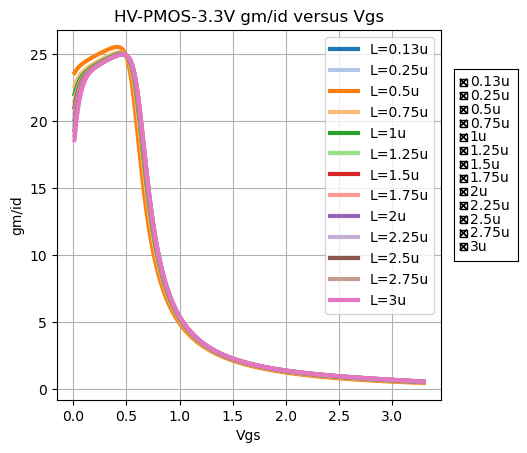

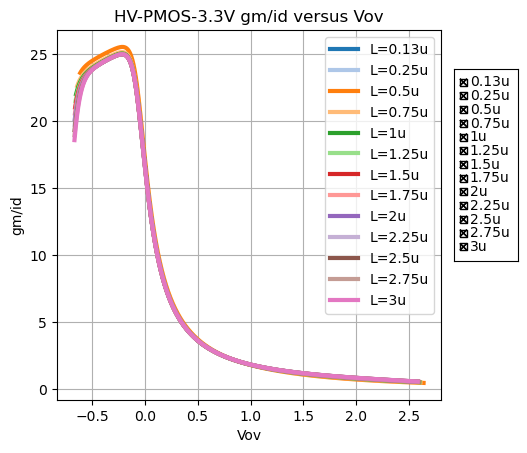

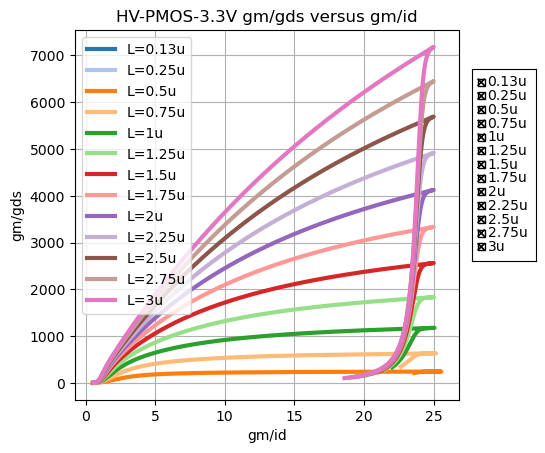

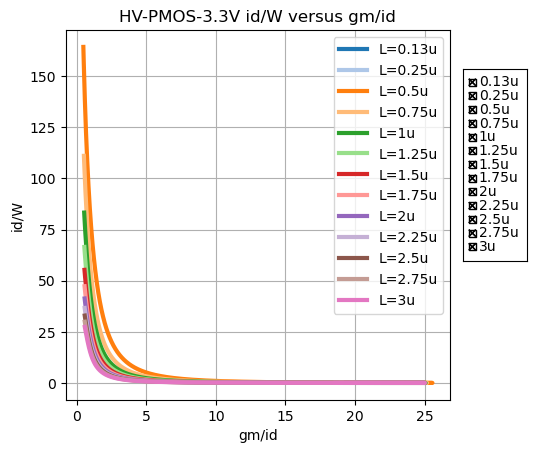

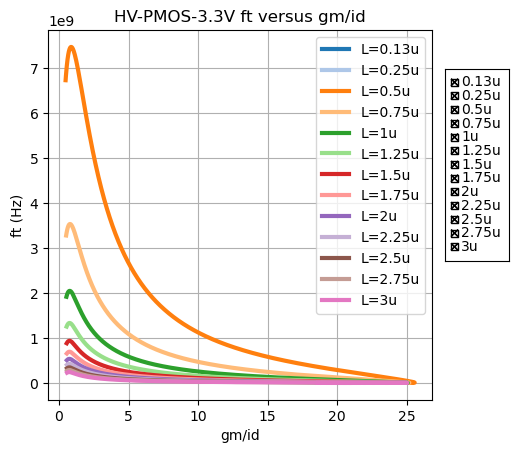

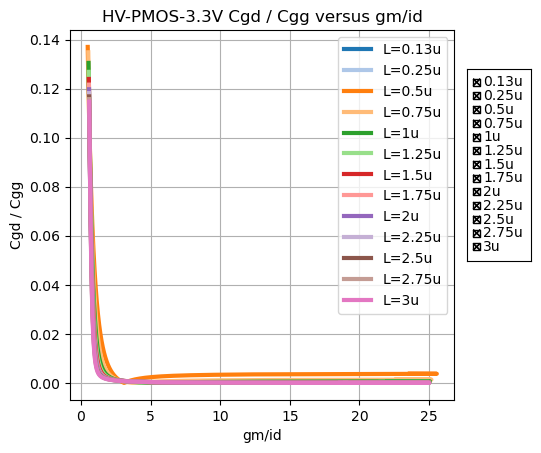

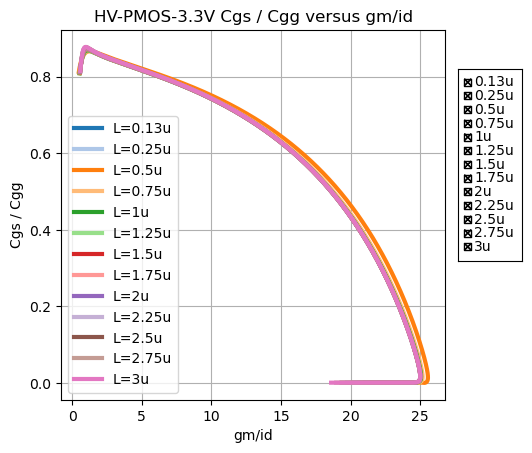

In [7]:
import matplotlib.pyplot as plt  # type: ignore
from matplotlib.widgets import CheckButtons  # type: ignore
import numpy as np

# Define the path to the directory
path = r"C:\Users\NITHIN P\Downloads\gmid_IHP130\gmid Data\HV_PMOS\\"

# Initialize lists for storing results
vgs = [[] for _ in range(13)]
gm_id = [[] for _ in range(13)]
gm_gds = [[] for _ in range(13)]
id_W = [[] for _ in range(13)]
ft = [[] for _ in range(13)]      # ft = gm / Cgg
cgd_cgg = [[] for _ in range(13)] # Cgd / Cgg
cgs_cgg = [[] for _ in range(13)] # Cgs / Cgg
Vov = [[] for _ in range(13)]     # Vov
W = 2e-6  # SKY130 W

# Read data from the text files
for i in range(2, 13):
    filename = path + "gmid_pmos_" + str(i + 1) + "_sg13_hv_pmos_tb.txt"
    try:
        with open(filename, 'r') as fID:
            for line in fID:
                try:
                    temp = list(map(float, line.strip().split()))
                    if len(temp) >= 14:  # Ensure at least 14 columns
                        Vgs = abs(temp[0])
                        gm = abs(temp[1])
                        id_val = abs(temp[3])
                        Vth = temp[5]  # Vth should retain its sign
                        gds = abs(temp[7])
                        Cgg = abs(temp[9])  
                        Cgs = abs(temp[11])  
                        Cgd = abs(temp[13])  

                        # Calculate Vov (Retain Sign of Vgs - Vth)
                        vov_value = Vgs - Vth

                        # Store the values
                        vgs[i].append(Vgs)
                        Vov[i].append(vov_value)
                        gm_id[i].append(gm / id_val)
                        gm_gds[i].append(gm / gds)
                        id_W[i].append(id_val / W)

                        # Calculate ft, Cgd/Cgg, and Cgs/Cgg
                        ft[i].append(gm / (2 * np.pi * Cgg))
                        cgd_cgg[i].append(Cgd / Cgg)
                        cgs_cgg[i].append(Cgs / Cgg)
                except (ValueError, IndexError) as e:
                    print(f"Warning: Skipping line due to error: {e}")
    except FileNotFoundError:
        print(f"Error: File {filename} not found.")
    except Exception as e:
        print(f"Error: An unexpected error occurred with file {filename}: {e}")

# Labels for different transistor lengths
labels = ['0.13u', '0.25u', '0.5u', '0.75u', '1u', '1.25u', '1.5u', '1.75u', '2u', '2.25u', '2.5u', '2.75u', '3u']

# Debugging: Print lengths of data arrays
print(f"Length of vgs: {len(vgs)}")
print(f"Length of gm_id: {len(gm_id)}")
print(f"Length of labels: {len(labels)}")

# Ensure all data lists and labels have the same length
min_length = min(len(vgs), len(gm_id), len(gm_gds), len(id_W), len(ft), len(cgd_cgg), len(cgs_cgg), len(Vov), len(labels))

# Function to auto-scale the axes based on visible lines and add margin
def autoscale_lines(ax, lines, margin=0.05):
    x_data, y_data = [], []

    # Collect data from visible lines
    for line in lines:
        if line.get_visible():
            x_data.extend(line.get_xdata())
            y_data.extend(line.get_ydata())

    if x_data and y_data:  # If there is visible data
        x_min, x_max = min(x_data), max(x_data)
        y_min, y_max = min(y_data), max(y_data)

        # Add margin (percentage of the range)
        x_margin = (x_max - x_min) * margin
        y_margin = (y_max - y_min) * margin

        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)
    else:  # Default to a small range if no data is visible
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

# Function to plot with checkboxes for toggling visibility
def plot_with_checkboxes(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.2, right=0.8)  # Adjust for space for checkboxes

    # Use a more varied colormap for better visibility
    colormap = plt.get_cmap('tab20')

    # Plot lines
    lines = []
    for i in range(min_length):
        line, = ax.plot(x_data[i], y_data[i], linestyle='-', color=colormap(i), linewidth=3, label=f"L={labels[i]}")
        lines.append(line)

    # Set labels, title, and grid
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

    # Add checkboxes
    rax = plt.axes([0.82, 0.4, 0.1, 0.4])
    visibility = [True] * min_length
    check = CheckButtons(rax, labels, visibility)

    # Function to handle checkbox toggle and auto-scale
    def toggle_lines(label):
        index = labels.index(label)
        lines[index].set_visible(not lines[index].get_visible())
        autoscale_lines(ax, lines)  # Auto-scale after toggling
        plt.draw()

    check.on_clicked(toggle_lines)

    # Initial auto-scaling
    autoscale_lines(ax, lines)
    plt.show()

# Plot gm/id versus Vgs
plot_with_checkboxes(vgs, gm_id, 'Vgs', 'gm/id', 'HV-PMOS-3.3V gm/id versus Vgs')

# Plot gm/id versus Vov
plot_with_checkboxes(Vov, gm_id, 'Vov', 'gm/id', 'HV-PMOS-3.3V gm/id versus Vov')

# Plot gm/gds versus gm/id
plot_with_checkboxes(gm_id, gm_gds, 'gm/id', 'gm/gds', 'HV-PMOS-3.3V gm/gds versus gm/id')

# Plot id/W versus gm/id
plot_with_checkboxes(gm_id, id_W, 'gm/id', 'id/W', 'HV-PMOS-3.3V id/W versus gm/id')

# Plot ft = gm / Cgg versus gm/id
plot_with_checkboxes(gm_id, ft, 'gm/id', 'ft (Hz)', 'HV-PMOS-3.3V ft versus gm/id')

# Plot Cgd / Cgg versus gm/id
plot_with_checkboxes(gm_id, cgd_cgg, 'gm/id', 'Cgd / Cgg', 'HV-PMOS-3.3V Cgd / Cgg versus gm/id')

# Plot Cgs / Cgg versus gm/id
plot_with_checkboxes(gm_id, cgs_cgg, 'gm/id', 'Cgs / Cgg', 'HV-PMOS-3.3V Cgs / Cgg versus gm/id')
